# Dividend

This notebook explores the dividend dataset. In particular we would like to examine if dividend paying firms have higher stock return on average when compare with non-dividend paying firms. 

## Data

Import necessary modules and the data from *dividend.csv*

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

In [4]:
m = pd.read_csv('dividend.csv', header=0, index_col=0)
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   returns          84 non-null     float64
 1   dividend_paying  84 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [7]:
m.head(10)

returns  dividend_paying
Firms                           
1      4.973648                1
2      3.332259                1
3      3.847519                1
4      5.177009                1
5      3.825861                1
6      5.373499                1
7      2.815667                1
8      2.576692                1
9      5.101139                1
10     4.253200                1

Note that the dummy variable *divident_paying* is used to indicate if a firm is a dividend paying firm. If $dividend\_paying = 1$ then the firm is a dividend paying firm. It is not a dividend paying firm if $dividend\_paying = 0$. 

In [6]:
dgroup = m.groupby('dividend_paying')
dgroup.describe()

returns                                                    \
                  count      mean       std       min       25%       50%   
dividend_paying                                                             
0                  39.0  2.361419  3.260890 -4.567592  0.428753  2.267841   
1                  45.0  4.091930  1.628799 -0.810544  3.389970  4.253200   

                                     
                      75%       max  
dividend_paying                      
0                4.315571  9.649893  
1                5.223322  6.706055

Given the nature of the variable, may also be worth take a look at the boxplot. 

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

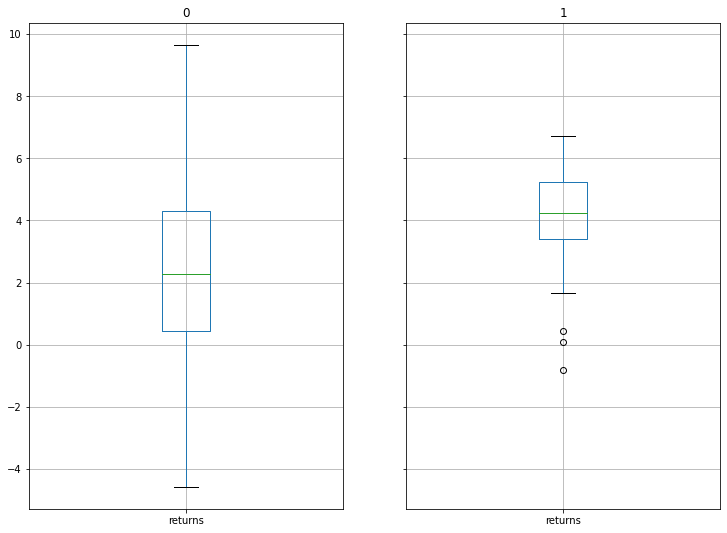

In [12]:
dgroup.boxplot(column='returns')

**Exercise** Do the above contain sufficient information to conduction a t-test to examine the difference in returns between the two firms? What assumptions will you need to make? 



## Hypothesis Testing 

We can explore the dataset a little before conducting a more format test. 

We can use *scipy.stats.ttest_ind* to conduct a t-test assuming the two samples are independent. In this case we are testing 

\begin{align}
    H_0:& \mu_1 = \mu_2 \\
    H_1:& \mu_2 \neq \mu_2
\end{align}

As demonstrated in *IntroToHypothesistesting.ipynb*, we need to store the data from each other as a separate numpy array in order to do the test. THis can be done via the *get_group* method. 

In [15]:
dividend, ndividend  = dgroup.get_group(1), dgroup.get_group(0) 

Then we call the *ttest_ind* function from *scipy.stats*

In [16]:
sps.ttest_ind(dividend['returns'], ndividend['returns'])

Ttest_indResult(statistic=3.1386624525973477, pvalue=0.002358894963247952)

The function asumes equal variance by default. We can test if that is true using the *scipy.stats.levene*

In [11]:
sps.levene(dividend['returns'], ndividend['returns'])

LeveneResult(statistic=12.847139858729284, pvalue=0.0005725377161735068)

The test rejects the null of equal variance, so we need to relax the assumption in the t-test by using the *equal_var* argument. 

In [17]:
sps.ttest_ind(dividend['returns'], ndividend['returns'], equal_var=False)

Ttest_indResult(statistic=3.0051279255832535, pvalue=0.004019637841015961)

While relaxing the assumption increases the p-value it is still low enough to reject the null of equal returns between the two groups of firms. 

**Exercise** We made the assumption that the two samples are independent. Can we still do the t-test if the two samples are in fact correlated? 